In [1]:
###9.2.5

import numpy as np
import matplotlib.pyplot as plt

from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from nilearn.plotting import show

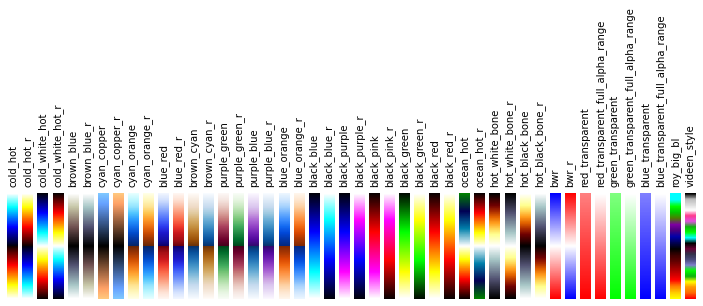

In [6]:
nmaps = len(nilearn_cmaps)
a = np.outer(np.arange(0, 1, 0.01), np.ones(10))

# Initialize the figure
plt.figure(figsize=(10, 4.2))
plt.subplots_adjust(top=0.4, bottom=0.05, left=0.01, right=0.99)

for index, cmap in enumerate(nilearn_cmaps):
    plt.subplot(1, nmaps + 1, index + 1)
    plt.imshow(a, cmap=nilearn_cmaps[cmap])
    plt.axis('off')
    plt.title(cmap, fontsize=10, va='bottom', rotation=90)

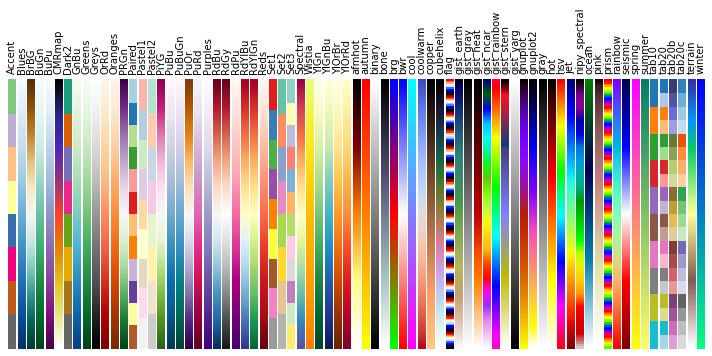

In [3]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0.05, left=0.01, right=0.99)
deprecated_cmaps = ['Vega10', 'Vega20', 'Vega20b', 'Vega20c', 'spectral']
m_cmaps = []
for m in plt.cm.datad:
    if not m.endswith("_r") and m not in deprecated_cmaps:
        m_cmaps.append(m)
m_cmaps.sort()

for index, cmap in enumerate(m_cmaps):
    plt.subplot(1, len(m_cmaps) + 1, index + 1)
    plt.imshow(a, cmap=plt.get_cmap(cmap), aspect='auto')
    plt.axis('off')
    plt.title(cmap, fontsize=10, va='bottom', rotation=90)

show()

In [7]:
###9.2.6

from nilearn import datasets

atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps


Dataset created in /home/pierre/nilearn_data/msdl_atlas



 ...done. (0 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.


/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/home/pierre/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


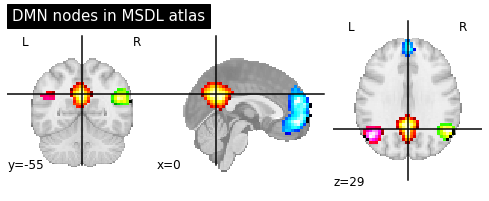

In [8]:
from nilearn import plotting, image

# First plot the map for the PCC: index 4 in the atlas
display = plotting.plot_stat_map(image.index_img(atlas_filename, 4),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

# Now add as an overlay the maps for the ACC and the left and right
# parietal nodes
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_green)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_pink)

plotting.show()

In [9]:
###9.2.7

dmn_nodes = image.index_img(atlas_filename, [3, 4, 5, 6])
# Note that dmn_node is now a 4D image
print(dmn_nodes.shape)

(40, 48, 35, 4)


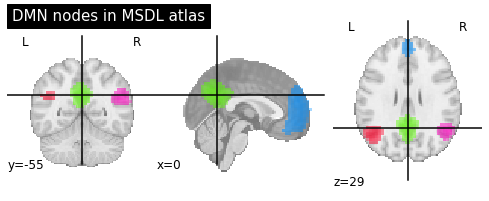

In [10]:
display = plotting.plot_prob_atlas(dmn_nodes,
                                   cut_coords=(0, -55, 29),
                                   title="DMN nodes in MSDL atlas")
plotting.show()